# Clifford Algebras

This notebook computes a basis of the real clifford algebra $Cl(s,t)$ in $s$ space and $t$ time dimensions. Our convention is that $(e_i)^2=-1$ if $e_i$ is spacelike and $(e_i)^2=1$ if $e_i$ is timelike.

## Initialization

In [9]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=True, wrap_line=False, no_global=True)

In [10]:
from sympy import I
from sympy.matrices import Matrix, eye
from sympy.physics.quantum import TensorProduct

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Some Definitions 

We define the low dimensional clifford algebras as:

$Cl(0,0)=\langle 1 \rangle \simeq \mathbb{R}(1)$

$Cl(1,0)=\langle 1, i \rangle \simeq \mathbb{C}(1)$

$Cl(0,1)=\langle 1, \sigma_2 \rangle \simeq \mathbb{R}(1)\oplus\mathbb{R}(1)$

$Cl(2,0)=\langle 1, \gamma_1, \gamma_2, \gamma_{12} \rangle \simeq \mathbb{H}(1)$

$Cl(1,1)=\langle 1, \sigma_1, \gamma_1, \sigma_1\gamma_1 \rangle \simeq \mathbb{R}(2)$

$Cl(0,2)=\langle 1, \sigma_1, \sigma_2, \sigma_{12} \rangle \simeq \mathbb{R}(2)$

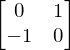

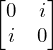

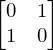

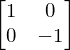

In [12]:
g1 = Matrix([[ 0, 1],[-1, 0]]);g1
g2 = Matrix([[ 0, I],[ I, 0]]);g2
s1 = Matrix([[ 0, 1],[ 1, 0]]);s1
s2 = Matrix([[ 1, 0],[ 0,-1]]);s2

## Implementation

Here we define `cl(s,t)` as the function that returns the generators of $Cl(s,t)$ as list of matrices.
The first entry of the list is the scalar of the algebra while the other entries are the vectors.

We use the relations:

$Cl(s,t)\equiv Cl(s-1,t-1)\otimes_{\mathbb{R}}Cl(1,1)$

$Cl(s,0)\equiv Cl(0,s-2)\otimes_{\mathbb{R}}Cl(2,0)$

$Cl(0,t)\equiv Cl(t-2,0)\otimes_{\mathbb{R}}Cl(0,2)$

In [13]:
def cl(s, t):
    if ( s < 0 ):
        return [eye(1)]
    elif ( s == 0 ):
        if ( t < 0 ):
            return [eye(1)]
        elif ( t == 0 ):
            return [eye(1)]
        elif ( t == 1 ):
            return [eye(2), s2]
        else:
            tmp = cl(t-2, s)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], s1*s2))
            new.append(TensorProduct(tmp[0], s1))
            new.append(TensorProduct(tmp[0], s2))
            return new
    elif ( s == 1 ):
        if ( t < 0 ):
            return [eye(1)]
        elif ( t == 0 ):
            return [eye(1), I*eye(1)]
        else:
            tmp = cl(s-1, t-1)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], g1*s1))
            new.append(TensorProduct(tmp[0], g1))
            new.append(TensorProduct(tmp[0], s1))
            return new
    else:
        if ( t < 0 ):
            return [eye(1)]
        elif ( t == 0 ):
            tmp = cl(t, s-2)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], g1*g2))
            new.append(TensorProduct(tmp[0], g1))
            new.append(TensorProduct(tmp[0], g2))
            return new
        else:
            tmp = cl(s-1, t-1)
            new = [TensorProduct(tmp[0], eye(2))]
            for i in range(0, t+s-2):
                new.append(TensorProduct(tmp[i+1], g1*s1))
            new.append(TensorProduct(tmp[0], g1))
            new.append(TensorProduct(tmp[0], s1))
            return new

The function `clifford(s,t)` returns a list of (degree 1) generators for the clifford algebra, written in a basis in which the pseudoscalar is diagonal.

In [14]:
def clifford(s, t):
    tmp = cl(s, t)
    pseudoscalar = 1;
    for i in range(0, len(tmp)):
        pseudoscalar *= tmp[i]
    if ( (I*pseudoscalar).is_Identity or (-I*pseudoscalar).is_Identity ):
        return tmp[1:]
    else:
        m = pseudoscalar.diagonalize()[0]
        new = []
        for i in range(1, len(tmp)):
            new.append(m.inv()*tmp[i]*m)
        return new

## Example:

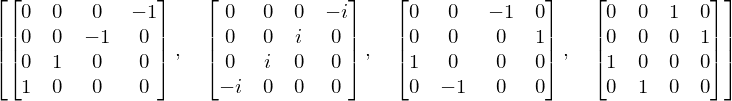

In [15]:
vectors = clifford(3,1)
vectors

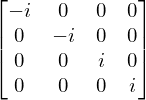

In [16]:
pseudoscalar = 1;
for i in range(0, len(vectors)):
    pseudoscalar *= vectors[i]
pseudoscalar